In [8]:
try:
    get_ipython().run_line_magic('load_ext', 'autoreload')
    get_ipython().run_line_magic('autoreload', '2')
except ModuleNotFoundError:
    print("autoreload extension not available. Continuing without autoreload.")


autoreload extension not available. Continuing without autoreload.


In [9]:
from templates import *
from templates_latent import *

E:\enanalytica_shanghai\diffae\metrics.py:10: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange


In [10]:
#device = 'cuda:3'import torch
device = 'cuda:0'
conf = ffhq256_autoenc_latent()
conf.T_eval = 100
conf.latent_T_eval = 100
# print(conf.name)
model = LitModel(conf)
state = torch.load(f'checkpoints/{conf.name}/last.ckpt', map_location='cpu',weights_only=False)
print(model.load_state_dict(state['state_dict'], strict=False))
model.to(device);

Seed set to 0


Model params: 212.29 M
loading pretrain ... 90M
step: 1563562
loading latent stats ...
<All keys matched successfully>


In [11]:
torch.manual_seed(4)
imgs = model.sample(8, device=device, T=20, T_latent=200)

E:\enanalytica_shanghai\diffae\diffusion\base.py:306: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(self.conf.fp16):


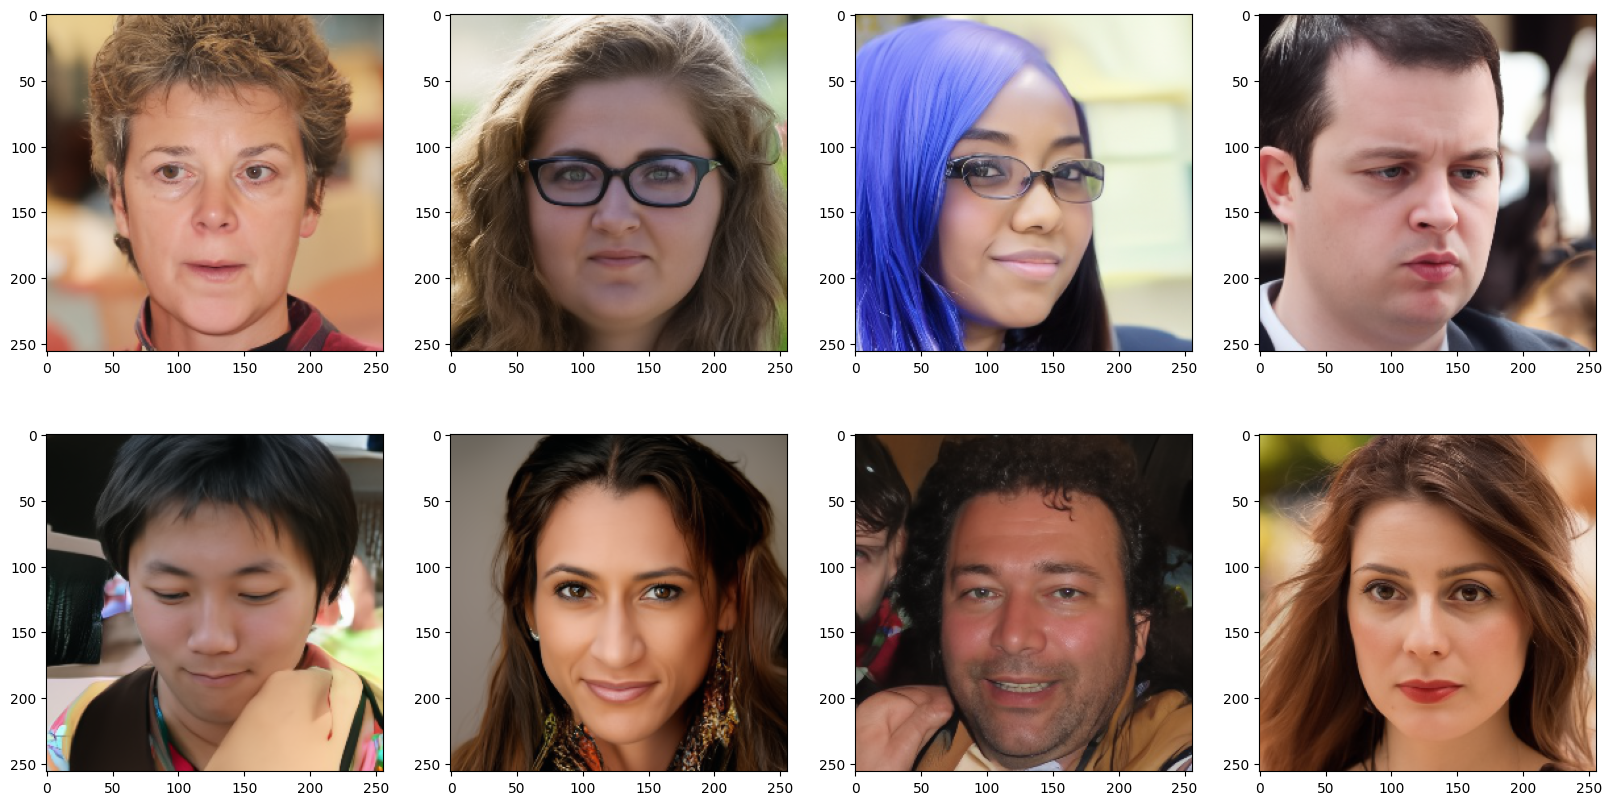

In [12]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 4, figsize=(4*5, 2*5))
ax = ax.flatten()
for i in range(len(imgs)):
    ax[i].imshow(imgs[i].cpu().permute([1, 2, 0]))